In [167]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [168]:
df = pd.read_csv('wine.csv')

## Set up K-means clustering for PCA

In [170]:
vars_to_standardize = ['fixed.acidity', 'volatile.acidity', 'citric.acid',	'residual.sugar', 'chlorides',\
                        'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH',	'sulphates', 'alcohol']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[vars_to_standardize])

kmeans = KMeans(n_clusters=3, random_state=42)


kmeans.fit(scaled_data)


df['Cluster'] = kmeans.labels_

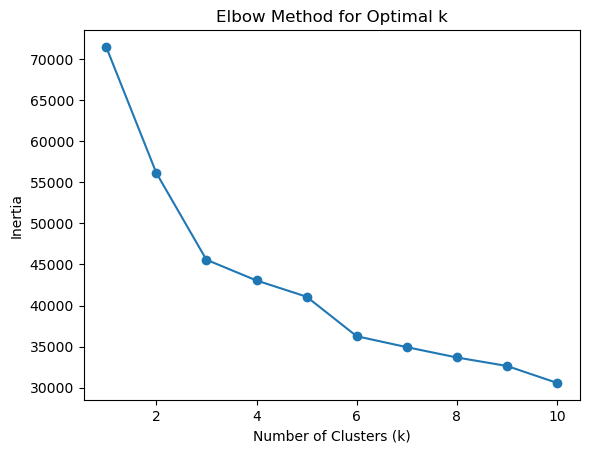

In [206]:
SSE = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

plt.plot(k_range, SSE, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

We will use 3 for our K due to the elbow kink

## Cluster by K-means and use PCA to visualize

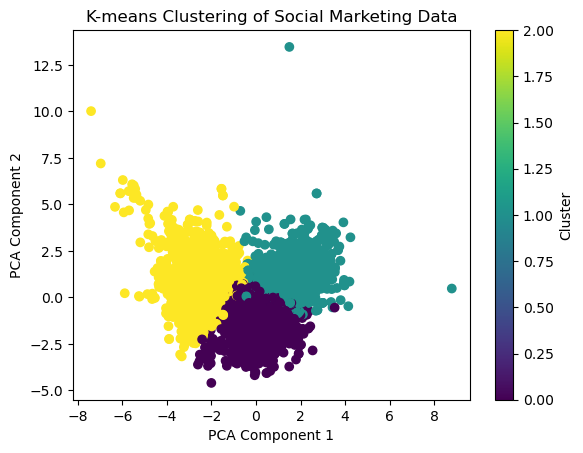

Cluster
0    3009
1    1896
2    1592
Name: count, dtype: int64


In [173]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Wines')
plt.colorbar(label='Cluster')
plt.show()

cluster_sizes = df['Cluster'].value_counts()

# Display the cluster sizes
print(cluster_sizes)

This is a nice clusteringwith distinguishable borders

## Plot Number Counts per Cluster

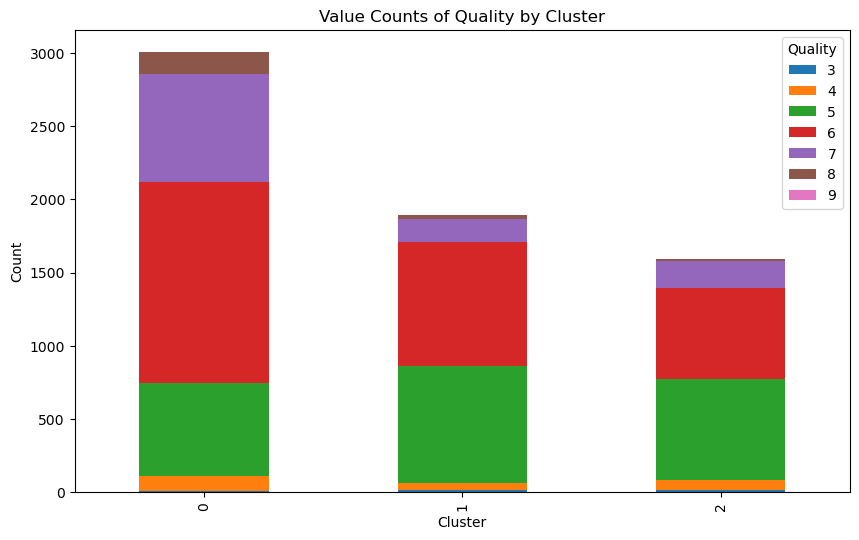

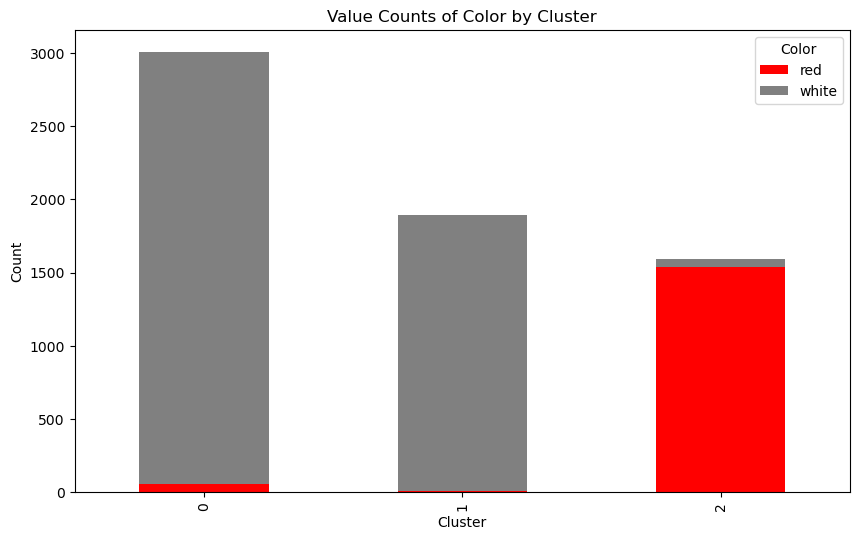

In [175]:
quality_counts = df.groupby('Cluster')['quality'].value_counts().unstack().fillna(0)

# Step 2: Group by 'Cluster' and get value counts for 'color'
color_counts = df.groupby('Cluster')['color'].value_counts().unstack().fillna(0)

# Step 3: Plot value counts for 'quality'
quality_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Value Counts of Quality by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Quality')
plt.show()


color_map = {
    'red': 'red',
    'white': 'gray',
}
# Step 4: Plot value counts for 'color'
color_list = [color_map.get(color, 'gray') for color in color_counts.columns]  # default to gray if color not mapped

color_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=color_list)
plt.title('Value Counts of Color by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Color')
plt.show()

When we do a value count for white and red wines, We can see the clustering is very good at distinguishing wine types.
The wine rating, on the other hand, is very uniform with the distribution of the value counts.

## Set up tSNE

In [177]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

# run t-SNE on the standardized data
tsne_results = tsne.fit_transform(df[vars_to_standardize])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.002s...
[t-SNE] Computed neighbors for 6497 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 2.613323
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.901756
[t-SNE] KL divergence after 1000 iterations: 0.832136


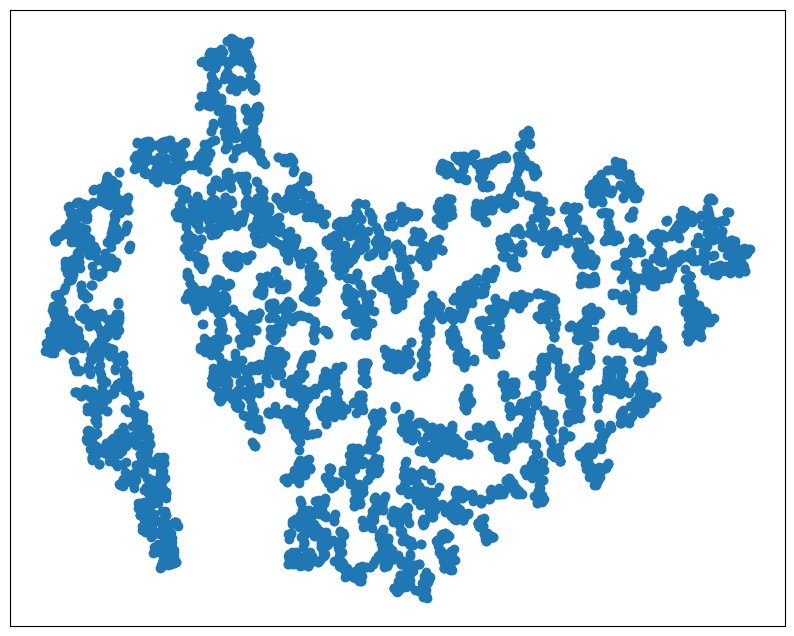

In [178]:
plt.figure(figsize=(10,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.show()

## Make interactive plot

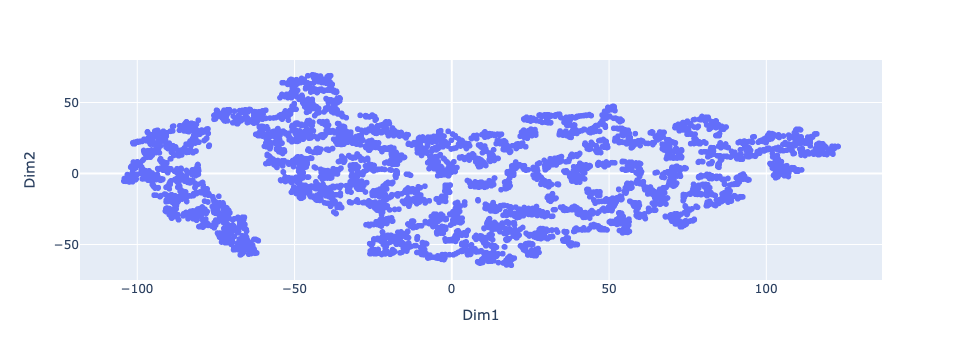

In [180]:
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

# add the county names to this DataFrame
tsne_df['color'] = df['color'].values
tsne_df['quality'] = df['quality'].values
# create an interactive plot
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', hover_data=['color', 'quality'])
fig.show()

## Plot best rated Wines

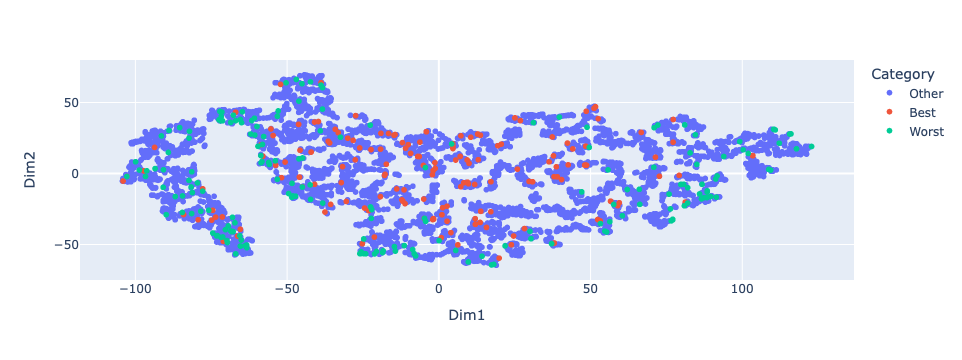

In [182]:

df['quality_cat'] = 'Other'
df.loc[df['quality'].nsmallest(200).index, 'quality_cat'] = 'Worst'
df.loc[df['quality'].nlargest(200).index, 'quality_cat'] = 'Best'

# add the categories to this DataFrame
tsne_df['Category'] = df['quality_cat'].values

# create an interactive plot
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='Category', hover_data=['color', 'quality'])
fig.show()

When looking at the best rated wines, there is no easy clustering that we can see.

## Plot Wine Color

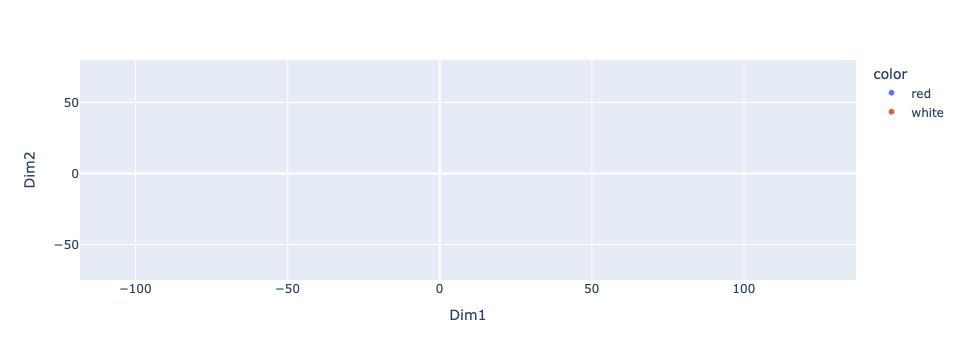

In [184]:


# add the categories to this DataFrame

# create an interactive plot
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='color', hover_data=['color', 'quality'])
fig.show()

Although the clustering is not very good, there is a good partition of the wines that are red and white.

## Plot Wine Quality on color scale

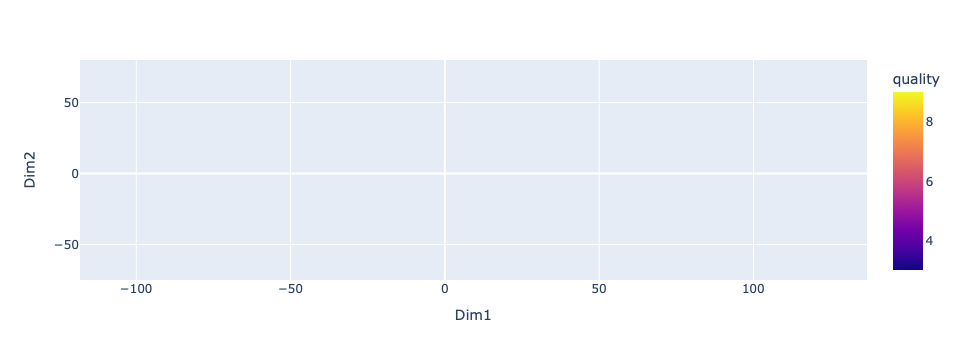

In [186]:
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='quality', hover_data=['color', 'quality'])
fig.show()

There are no eaily identifyable clusters when looking at how the wines were rated by the humans.